## Import Libraries

In [1]:
import os, sys

import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError

In [5]:
from sklearn.linear_model import LogisticRegressionCV

## Read Data

In [6]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


## Drop Customer ID Column

In [7]:
df.drop(labels=['customerID'], axis=1, inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Convert Total Charges column to float

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Shorten column labels

In [11]:
## Shorten the Labels
value_mapper = {'Female': 'F', 'Male': 'M', 'Yes': 'Y', 'No': 'N',
                'No phone service': 'No phone', 'Fiber optic': 'Fiber',
                'No internet service': 'No internet', 'Month-to-month': 'Monthly',
                'Bank transfer (automatic)': 'Bank transfer',
                'Credit card (automatic)': 'Credit card',
                'One year': '1 yr', 'Two year': '2 yr'}
df.replace(to_replace=value_mapper, inplace=True)

## Convert column names to lower case

In [12]:
df.columns = [label.lower() for label in df.columns]
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,F,M,M,M,F,F,M,F,F,M
seniorcitizen,0,0,0,0,0,0,0,0,0,0
partner,Y,N,N,N,N,N,N,N,Y,N
dependents,N,N,N,N,N,N,Y,N,N,Y
tenure,1,34,2,45,2,8,22,10,28,62
phoneservice,N,Y,Y,N,Y,Y,Y,N,Y,Y
multiplelines,No phone,N,N,No phone,N,Y,Y,No phone,Y,N
internetservice,DSL,DSL,DSL,DSL,Fiber,Fiber,Fiber,DSL,Fiber,DSL
onlinesecurity,N,Y,Y,Y,N,N,N,Y,N,Y
onlinebackup,Y,N,Y,N,N,N,Y,N,N,Y


## Drop rows with tenure = 0

In [13]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [14]:
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   seniorcitizen     7032 non-null   int64  
 2   partner           7032 non-null   object 
 3   dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   phoneservice      7032 non-null   object 
 6   multiplelines     7032 non-null   object 
 7   internetservice   7032 non-null   object 
 8   onlinesecurity    7032 non-null   object 
 9   onlinebackup      7032 non-null   object 
 10  deviceprotection  7032 non-null   object 
 11  techsupport       7032 non-null   object 
 12  streamingtv       7032 non-null   object 
 13  streamingmovies   7032 non-null   object 
 14  contract          7032 non-null   object 
 15  paperlessbilling  7032 non-null   object 
 16  paymentmethod     7032 non-null   object 


## Convert object type columns to string

In [16]:
def find_string(df, cutoff=10):
    """
        Function to find string columns in the dataframe.
    """
    str_cols = []
    for col in df.columns:
        if len(df[col].unique()) <= cutoff:
            str_cols.append(col)
    return str_cols


def to_string(columns, df):
    """
        Converts the columns passed in `columns` to string datatype
    """
    for col in columns:
        df[col] = df[col].astype('string')
    return df

def summarize_stringcols(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels', 'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]

In [17]:
summarize_stringcols(df, show_levels=True)

,Levels,No. of Levels,No. of Missing Values
gender,"[F, M]",2,0
seniorcitizen,"[0, 1]",2,0
partner,"[Y, N]",2,0
dependents,"[N, Y]",2,0
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",72,0
phoneservice,"[N, Y]",2,0
multiplelines,"[No phone, N, Y]",3,0
internetservice,"[DSL, Fiber, N]",3,0
onlinesecurity,"[N, Y, No internet]",3,0
onlinebackup,"[Y, N, No internet]",3,0


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthlycharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [19]:
df = to_string(find_string(df), df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   string 
 1   seniorcitizen     7032 non-null   string 
 2   partner           7032 non-null   string 
 3   dependents        7032 non-null   string 
 4   tenure            7032 non-null   int64  
 5   phoneservice      7032 non-null   string 
 6   multiplelines     7032 non-null   string 
 7   internetservice   7032 non-null   string 
 8   onlinesecurity    7032 non-null   string 
 9   onlinebackup      7032 non-null   string 
 10  deviceprotection  7032 non-null   string 
 11  techsupport       7032 non-null   string 
 12  streamingtv       7032 non-null   string 
 13  streamingmovies   7032 non-null   string 
 14  contract          7032 non-null   string 
 15  paperlessbilling  7032 non-null   string 
 16  paymentmethod     7032 non-null   string 


## Reorder tenure columns, put if before monthlycharges

In [20]:
new_order = list(df.columns)
new_order.insert(16, new_order.pop(4))
df = df[new_order]
df.head(2)

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,tenure,monthlycharges,totalcharges,churn
0,F,0,Y,N,N,No phone,DSL,N,Y,N,N,N,N,Monthly,Y,Electronic check,1,29.85,29.85,N
1,M,0,N,N,Y,N,DSL,Y,N,Y,N,N,N,1 yr,N,Mailed check,34,56.95,1889.50,N


## Train-Test Split

In [21]:
x = df.iloc[:, :-1]
y = df['churn']

string_columns = list(x.select_dtypes(include='string').columns)
numeric_columns = list(x.select_dtypes(exclude='string').columns)

In [22]:
data_splits = train_test_split(x, y, test_size=0.25, random_state=0,
                               shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits


# For CatBoost and Naive Bayes
data_splits = train_test_split(x, y, test_size=0.25, random_state=0,
                               shuffle=True, stratify=y)
x_train_cat, x_test_cat, y_train_cat, y_test_cat = data_splits


# Save the non-scaled version of monthlycharges and totalcharges to compare classifiers
x_test_charges = np.array(x_test[['monthlycharges', 'totalcharges']], copy=True)

list(map(lambda x: x.shape, [x, y, x_train, x_test, y_train, y_test]))

[(7032, 19), (7032,), (5274, 19), (1758, 19), (5274,), (1758,)]

In [23]:
pd.Series(y_test).value_counts()

N    1291
Y     467
Name: churn, dtype: Int64

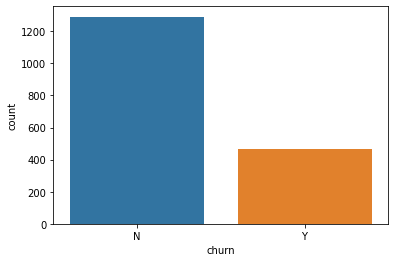

In [24]:
sns.countplot(x=y_test);

In [25]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 1720 to 6825
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5274 non-null   string 
 1   seniorcitizen     5274 non-null   string 
 2   partner           5274 non-null   string 
 3   dependents        5274 non-null   string 
 4   phoneservice      5274 non-null   string 
 5   multiplelines     5274 non-null   string 
 6   internetservice   5274 non-null   string 
 7   onlinesecurity    5274 non-null   string 
 8   onlinebackup      5274 non-null   string 
 9   deviceprotection  5274 non-null   string 
 10  techsupport       5274 non-null   string 
 11  streamingtv       5274 non-null   string 
 12  streamingmovies   5274 non-null   string 
 13  contract          5274 non-null   string 
 14  paperlessbilling  5274 non-null   string 
 15  paymentmethod     5274 non-null   string 
 16  tenure            5274 non-null   int64

## Column Enconding

In [26]:
string_columns = list(x.select_dtypes(include='string').columns)


## Column Transformer
transformers = [('one_hot_encoder',
                  OneHotEncoder(drop='first',dtype='int'),
                  string_columns),
                ('standard_scaler', StandardScaler(), numeric_columns)]
x_trans = ColumnTransformer(transformers, remainder='passthrough')

In [27]:
## Applying Column Transformer
x_train = x_trans.fit_transform(x_train)
x_test = x_trans.transform(x_test)

## Label encoding
y_trans = LabelEncoder()
y_train = y_trans.fit_transform(y_train)
y_test = y_trans.transform(y_test)


## Save feature names after one-hot encoding for feature importances plots
feature_names = list(x_trans.named_transformers_['one_hot_encoder'] \
                            .get_feature_names(input_features=string_columns))
feature_names = feature_names + numeric_columns

## Machine Learning Report Related Functions

In [28]:
def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.close()
    
    return fig

In [29]:
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs, drop_intermediate=False)
    auc = round(roc_auc_score(y_true, y_probs), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [30]:
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(r, p, ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(thresh, p, label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

In [31]:
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig

In [32]:
def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(x_train)
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(x_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(x_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(x_train)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [33]:
def model_memory_size(clf):
    return sys.getsizeof(pickle.dumps(clf))

In [34]:
def report(clf, x_train, y_train, x_test, y_test, sample_weight=None,
           refit=False, importance_plot=False, confusion_labels=None,
           feature_labels=None, verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, x_train, y_train,
                                                     sample_weight=sample_weight,
                                                     refit=refit)
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    
    test_acc = accuracy_score(y_test, test_predictions)
    y_probs = clf.predict_proba(x_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_probs)
    
    
    ## Model Memory
    model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {x_train.shape[0]} samples")
    print(f" Test Size: {x_test.shape[0]} samples")
    print("------------------------------------------")
    print(f"Training Time: {round(train_time, 3)} seconds")
    print(f" Testing Time: {round(test_time, 3)} seconds")
    print("------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("------------------------------------------")
    print(" Area Under ROC: ", roc_auc)
    print("------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))
    
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions),
                               labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")


        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        roc_axes = axes[0, 0]
        pr_axes = axes[0, 1]
        importances = None

        if importance_plot:
            if not feature_labels:
                raise RuntimeError("'feature_labels' argument not passed "
                                   "when 'importance_plot' is True")

            try:
                importances = pd.Series(clf.feature_importances_,
                                        index=feature_labels) \
                                .sort_values(ascending=False)
            except AttributeError:
                try:
                    importances = pd.Series(clf.coef_.ravel(),
                                            index=feature_labels) \
                                    .sort_values(ascending=False)
                except AttributeError:
                    pass

            if importances is not None:
                # Modifying grid
                grid_spec = axes[0, 0].get_gridspec()
                for ax in axes[:, 0]:
                    ax.remove()   # remove first column axes
                large_axs = fig.add_subplot(grid_spec[0:, 0])

                # Plot importance curve
                feature_importance_plot(importances=importances.values,
                                        feature_labels=importances.index,
                                        ax=large_axs)
                large_axs.axvline(x=0)

                # Axis for ROC and PR curve
                roc_axes = axes[0, 1]
                pr_axes = axes[1, 1]
            else:
                # remove second row axes
                for ax in axes[1, :]:
                    ax.remove()
        else:
            # remove second row axes
            for ax in axes[1, :]:
                ax.remove()


        ## ROC and Precision-Recall curves
        clf_name = clf.__class__.__name__
        roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, train_acc=train_acc, train_time=train_time,
                train_predictions=train_predictions, test_acc=test_acc,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump

In [35]:
def compare_models(y_test=None, clf_reports=[], labels=[]):
    """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
                  fig: `matplotlib` figure object with ROC and PR curves """

    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train Accuracy', 'Test Accuracy', 'Overfitting', 'ROC Area',
             'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        train_acc = round(clf_reports[i]['train_acc'], 3)
        test_acc = round(clf_reports[i]['test_acc'], 3)
        clf_probs = clf_reports[i]['test_probs']
        roc_auc = clf_reports[i]['roc_auc']
        
        # Get metrics of True Positive class from sklearn classification_report
        true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = [train_acc, test_acc,
                               test_acc < train_acc, roc_auc] + true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    
    ## Compare Plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # ROC and Precision-Recall
    for i in range(len(clf_reports)):
        clf_probs = clf_reports[i]['test_probs']
        roc_plot(y_test, clf_probs, label=clf_names[i],
                 compare=True, ax=axes[0])
        precision_recall_plot(y_test, clf_probs, label=clf_names[i],
                              compare=True, ax=axes[1])
    # Plot No-Info classifier
    axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    fig.tight_layout()
    plt.close()
    
    return table.T, fig

## Model Training using LogisticRegression

In [36]:
confusion_lbs = ['No Churn', 'Churn']

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=500, multi_class='auto', n_jobs=-1, penalty='l1',
                     random_state=0, refit=True, scoring='f1',
                     solver='liblinear', tol=0.0001, verbose=0)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 13.403 seconds
 Testing Time: 0.0 seconds
------------------------------------------
Train Accuracy:  0.7510428517254456
 Test Accuracy:  0.7519908987485779
------------------------------------------
 Area Under ROC:  0.8446923769731811
------------------------------------------
Model Memory Size: 14.33 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score 

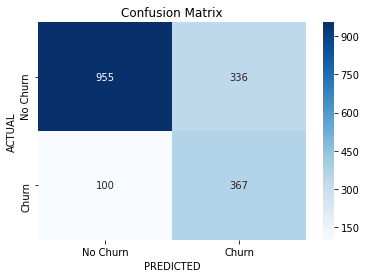


=======================================> PLOTS <=========================================


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


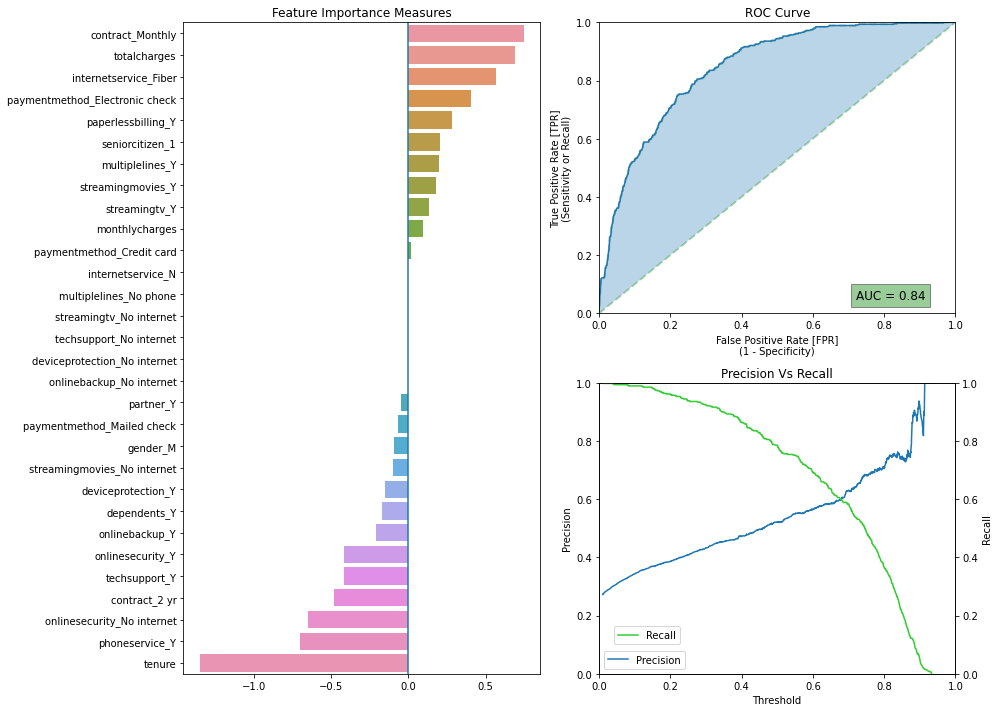

In [37]:
logit_cv = LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=500,
                                scoring='f1', penalty='l1', solver='liblinear',
                                n_jobs=-1, random_state=0, refit=True, verbose=0)

logit_cv, logit_report = report(logit_cv, x_train, y_train,
                                x_test, y_test, refit=True,
                                importance_plot=True,
                                feature_labels=feature_names,
                                confusion_labels=confusion_lbs)

## Model Training using XGBoost

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=2.761768901569187, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

================

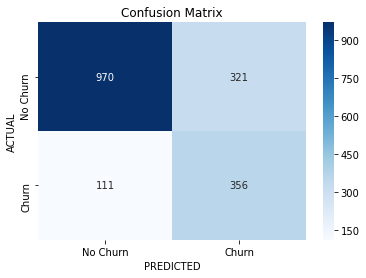


=======================================> PLOTS <=========================================


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


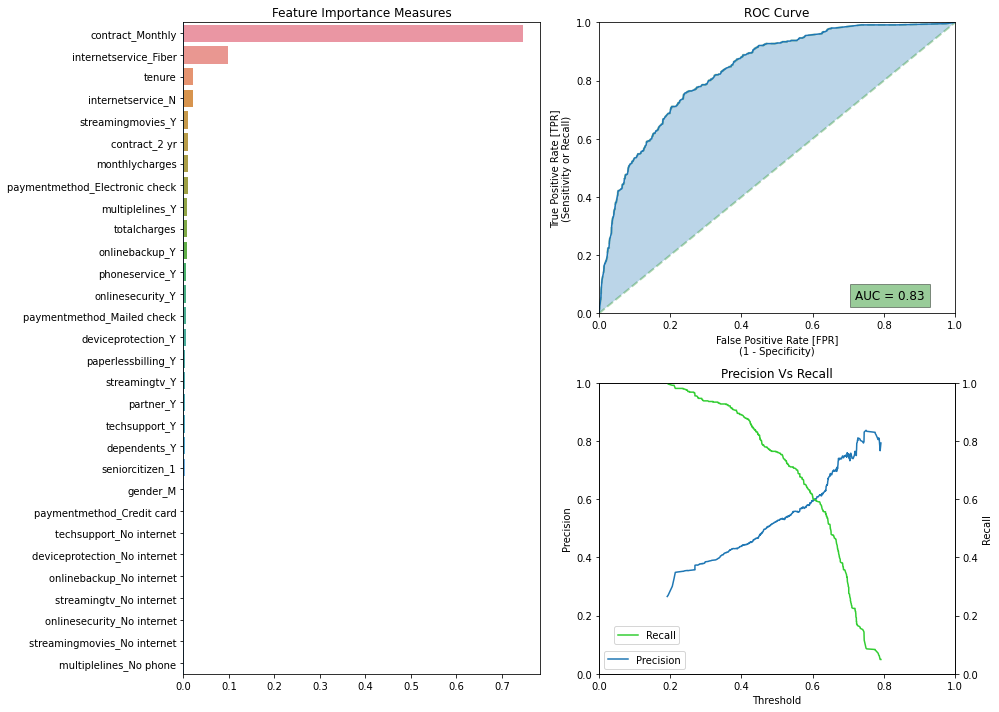

In [38]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight

## Compute `class_weights` using sklearn
cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)

xgb_clf = XGBClassifier(learning_rate=0.01, random_state=0,
                        scale_pos_weight=cls_weight, n_jobs=-1)
xgb_clf.fit(x_train, y_train);

xgb_clf, xgb_report = report(xgb_clf, x_train, y_train,
                             x_test, y_test,
                             importance_plot=True,
                             feature_labels=feature_names,
                             confusion_labels=confusion_lbs)

## Compare Models

In [39]:
report_list = [logit_report,xgb_report]
clf_labels = [rep['clf'].__class__.__name__ for rep in report_list]

In [40]:
compare_table, compare_plot = compare_models(y_test, clf_reports=report_list, labels=clf_labels)

compare_table.sort_values(by=['Overfitting'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

,Train Accuracy,Test Accuracy,Overfitting,ROC Area,Precision,Recall,F1-score,Support
LogisticRegressionCV,0.751,0.752,False,0.844692,0.522048,0.785867,0.62735,467
XGBClassifier,0.788,0.754,True,0.834755,0.525849,0.762313,0.622378,467


### Dump Best Model into a .pkl file

In [41]:
pickle.dump(logit_cv, open('telco-churn_logreg_clf.pkl', 'wb'))